# 07 - 1

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
train_input.shape, train_target.shape

((60000, 28, 28), (60000,))

In [3]:
test_input.shape, test_target.shape

((10000, 28, 28), (10000,))

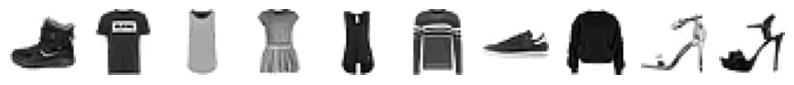

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [6]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [7]:
## 로지스틱 회귀로 패션 아이템 분류하기

In [8]:
# 이 데이터의 경우 각 픽셀은 0~255 사이의 정수라서 보통 255로 나누어 0~1 사이의 값으로 정규화함
# reshape의 두 번째 매개변수를 28 * 28 로 하면 데이터의 두 번째, 세 번째 차원이 1차원으로 합쳐짐
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [9]:
train_scaled.shape

(60000, 784)

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
np.mean(scores['test_score'])

0.8196000000000001

In [11]:
# 로지스틱 회귀로는 높은 점수를 얻지 못한다
# 그러니까 인공 신경망을 만들어 성능을 높일 수 있는지 확인해보자

In [12]:
## 인공 신경망

In [13]:
# 클래스가 총 10개이므로 z1 ~ z10 : 출력층
# z 값을 계산하는 단위를 뉴런 혹은 유닛 : 선형 계산이 전부임
# 픽셀 1,2를 x1, x2로 픽셀이 총 784개이므로 x784까지 있음 : 입력층

In [14]:
# 가장 인기가 많은 딥러닝 라이브러리인 텐서플로를 사용해 인공 신경망을 만들거임
# 케라는 텐서플로의 고수준 API임 : GPU를 사용함

In [15]:
from tensorflow import keras

In [16]:
## 인공 신경망으로 모델 만들기

In [17]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [18]:
# 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적이고, 교차 검증을 수행하기에는 훈련 시간이 너무 오래걸리기에 교차 검증을 사용하지 않고 검증 세트를 별도로 덜어내어 사용함

In [19]:
train_scaled.shape, train_target.shape

((48000, 784), (48000,))

In [20]:
val_scaled.shape, val_target.shape

((12000, 784), (12000,))

In [21]:
# 출력층을 먼저 구성할 것이고 이 중 가장 기본이 되는 층은 밀집층임 입력층 784개가 전부 하나의 출력층으로 밀집되어있기 때문 또한 양쪽이 뉴런이 모두 연결하고 있기에 완전 연결층이라고도 부름

In [22]:
# 케라스의 Dense 클래스를 사용해 밀집층을 만들거고, 필요한 매개변수는 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기임
dense = keras.layers.Dense(10, activation='softmax',input_shape=(784,))
# 다중 분류이므로 시그모이드가 아닌 소프트맥스를 사용, 이진 분류면 시그모이드 사용

In [23]:
# 만들어진 밀집층으로 신경망 모델 작성, 케라스의 Sequential 클래스 사용
model = keras.Sequential(dense)

In [24]:
## 인공 신경망으로 패션 아이템 분류하기

In [25]:
# 케라스 모델은 훈련하기 전, compile()메서드를 통해 설정 단계를 거쳐야함. 여기서 손실 함수는 꼭 지정해야함
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 다중 분류에서는 크로스 엔트로피 손실 함수를 사용하는데 각각 밑과 같음
# 이진 분류 : binary_crossentropy
# 다중 분류 : categorical_crossentropy

In [26]:
# 원-핫 인코딩 : 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것
# 예를 들어 샘플이 티셔츠일 경우 첫 번쨰 뉴런의 활성화 함수 출력인 a1에 크로스 엔트로피 손실 함수를 적용하고 나머지를 전부 0을 곱해 0으로 만듬
# 그리고 손실을 낮추기 위해서 a1의 값을 가능한 1에 가깝게 만드는 것
# 그럼 한 번 패션 MNIST의 타깃값을 살펴보자
train_target[:10]

array([7, 3, 5, 8, 6, 9, 3, 3, 9, 9], dtype=uint8)

In [27]:
# 타깃값이 모두 정수일 때는 굳이 원-핫 인코딩을 사용하지 않고 바로 크로스 엔트로피 손실을 계산하는 것이 sparse_categorical_crossentropy임
# 원-핫 인코딩을 사용하려면 손실 함수를 loss='categorical_crossentropy'로 지정하면 됨

In [28]:
# 두 번째 매개변수인 metrics에서 accuracy는 정확도 지표를 보여주기 위해 사용한 것

In [29]:
# 모델 훈련 시작
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6090 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4756 - accuracy: 0.8400
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4501 - accuracy: 0.8468
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4378 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4293 - accuracy: 0.8562


In [30]:
# 이제 앞서 떼어놓은 검증 세트를 사용하여 모델의 성능을 확인할 거임
# 케라스에서는 evaluate() 메서드를 사용해서 성능을 확인함
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.8482


[0.44385525584220886, 0.8482499718666077]

# 07 - 2

In [31]:
## 2개의 층

In [32]:
# 인공 신경망 모델에 층을 2개 추가할 것임
# 기존에 했던 것과 다른 점은 입력층과 출력층 사이에 밀집층이 추가되는 것인데 이 둘 사이에 있는 모든 밀집층을 은닉층이라고 부름
# 은닉층에는 시그모이드와 소프트맥스를 사용하는 출력층과 다르게 비교적 자유로운 활성화 함수 사용가능하며 대표적인게 시그모이드와 렐루 함수임
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
# dense1은 시그모이드 함수를 적용한 은닉층이고 dense2는 출력층임, 은닉층의 뉴런 개수를 정하는데는 특별한 기준은 없으나 적어도 출력층보다는 많이 만들어야함

In [33]:
## 심층 신경망 만들기

In [34]:
model = keras.Sequential([dense1, dense2])
# 여러 개의 층을 추가하려면 리스트 형식으로 만들어서 전달하며 출력층을 가장 마지막에 두어야함

In [35]:
# 케라스의 summary() 메서드로 정보를 얻을 수 있음
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# 은닉층의 첫번째 입력 픽셀 784개와 지정해 준 뉴런 개수 100개에 절편이 따로 100개가 추가되므로 출력되는 모델 파라미터의 개수는 784 * 100 + 100으로 78500개
# 출력층은 출력 뉴런의 개수가 10개고 은닉층에서 784개의 픽셀이 100개로 압축되었기에 100 * 10 + 10으로 1010개임

In [37]:
## 층을 추가하는 다른 방법

In [38]:
# 앞에서는 객체(dense1, dense2)를 만들어서 직접 전달했지만 일반적으로는 두 객체를 따로 저장해서 쓸 일이 없기에 Sequential의 생성자에서 바로 객체를 생성함
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
                          keras.layers.Dense(10, activation='softmax', name='output')], name='패션 NMIST 모델')

In [39]:
model.summary()

Model: "패션 NMIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# 하지만 이 경우에는 층이 많아지면 생성자가 너무 길어지며 따로 층을 추가할 수도 없기에 일반적으로 층을 추가할때는 모델의 add() 메서드를 사용함
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5712 - accuracy: 0.8049
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4128 - accuracy: 0.8519
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8629
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3521 - accuracy: 0.8720
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.8782


In [43]:
# 추가된 층 덕분에 성능이 향상되었음!

In [44]:
## 렐루 함수

In [45]:
# 이미지 분류 문제에서 높은 성능을 보임
# 양수를 받으면 입력을 통과시키고 음수를 받으면 0으로 만듬

In [46]:
# 데이터가 28 * 28 크기이기 때문에 reshape을 사용하여 1차원으로 펼쳤지만, 케라스에서는 Flatten이라는 층을 추가해 펼칠 수 있음
# Flatten은 활성화 함수가 있는 것은 아니고 그냥 펼쳐주는 역할만 하기 때문에 신경망의 깊이에는 포함되지 않음
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# reshape 없이 Flatten을 이용해서 모델 훈련 해보자
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [49]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5421 - accuracy: 0.8078
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3969 - accuracy: 0.8572
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8696
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8774
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3170 - accuracy: 0.8867


In [50]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3765 - accuracy: 0.8725


[0.3765200972557068, 0.8725000023841858]

In [51]:
## 옵티마이저

In [52]:
# 신경망의 하이퍼파라미터 : 추가할 은닉층의 개수, 은닉층의 뉴런 개수, 층의 종류 등
# 케라스는 기본적으로 미니배치 경사 하강법을 사용하고 미니배치의 개수는 32개, fit() 메서드에서 batch_size 매개변수를 통해 조정가능, 마찬가지로 epochs 역시 하이퍼파라미터
# compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘은 RMSprop을 사용하는데 케라스에서는 다양한 종류의 경사 하강법 알고리즘을 제공하며, 이를 옵티마이저라고 부름
# 또한 RMSprop의 학습률 역시도 하이퍼파라미터임
# 여기서는 여러가지 옵티마이저를 테스트 해보겠음

In [53]:
# 확률적 경사 하강법 = SGD
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [54]:
# 이미 tensorflow.keras.potimizers에 구현되어 있어서
# sgd = keras.optimizers.SGD()를 생략 가능
# 만약 학습률을 바꾸고 싶다면
sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 같은 식으로 조정 가능

In [55]:
# 옵티마이저에는
# 기본 경사 하강법 옵티마이저 : SGD, => 모멘텀(momentum), 네스테로프 모멘텀(nesterov), Adam
# 적응적 학습률 옵티마이저 : RMSprop, => Adam / Adagrad

In [56]:
# 기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공
# 모멘텀 매개변수의 기본값은 0 이며 이를 더 큰 값으로 지정하면 모멘턴 최적화를 사용하고 일반적으로 모멘텀 매개변수는 0.9 이상을 지정함
# 네스테로프 매개변수의 기본값이 False를 True로 바꾸면 네스테로프 모멘텀 최적화를 사용 => 모멘텀 최적화를 2번 반복하며 대부분 기본 확률적 경사 하강법보다 성능이 좋음
sgd = keras.optimizers.SGD(momentum=0.9, nesterov= True)

In [57]:
# 모델이 최적점에 가까워질수록 학습률을 낮출 수 있는데 이런 학습률을 적응적 학습률이라고 함
# 대표적인게 RMSprop과 Adagrad 고 optimizer 매개변수의 기본값이 RMSprop임
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')
# 혹은
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [58]:
# 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이며 이를 이용해 모델을 훈련시켜보겠음
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5260 - accuracy: 0.8150
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3950 - accuracy: 0.8578
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3539 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3255 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3082 - accuracy: 0.8871


In [60]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.8703


[0.35861194133758545, 0.8703333139419556]

# 07 - 3

In [74]:
## 손실 곡선

In [61]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [64]:
# 모델을 만드는 함수를 제작
# 받는 변수는 은닉층 추가용
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [66]:
model = model_fn()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               78500     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# verbose 매개변수는 기본값은 1로 훈련과정을 보여주는 것, 2로 바꾸면 진행 막대를 빼고 출력되며 0은 출력하지않음

In [69]:
# 훈련 측정값이 담겨 있는 history 딕셔너리 'loss' 와 'accuracy'가 포함되어있음 (손실과 정확도)
history.history.keys()

dict_keys(['loss', 'accuracy'])

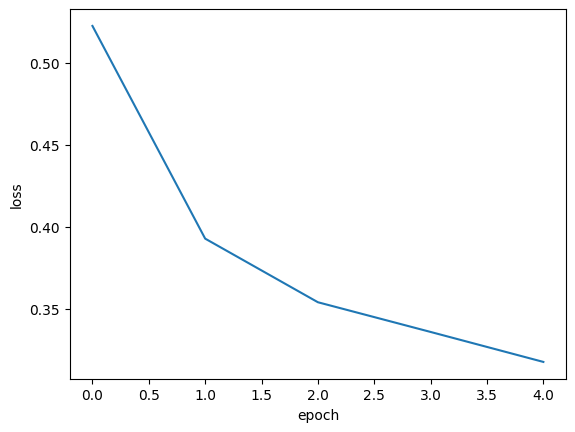

In [70]:
# 손실값 출력해서 그래프로 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

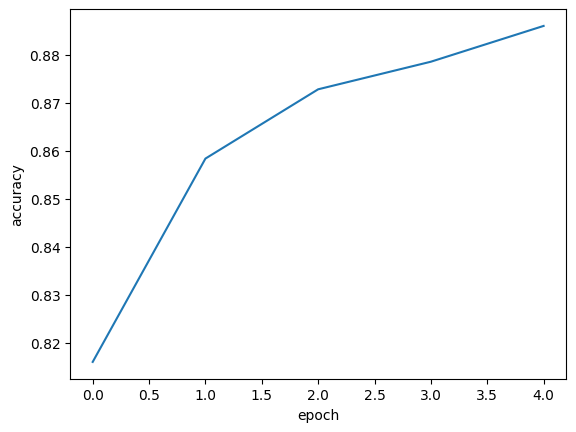

In [71]:
# 정확도 출력해서 그래프로 그리기
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

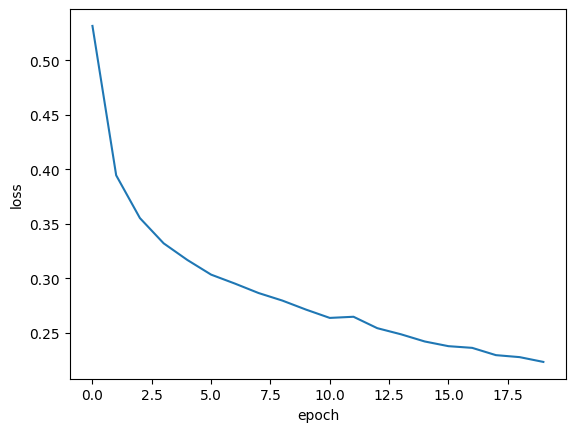

In [72]:
# 에포크 마다 손실량은 감소하고 정확도는 향상함
# 그럼 에포크를 더 늘려보겠음
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [73]:
# 손실이 예상대로 잘 감소하는 것 같지만 뭔가 놓친게 있는데?

In [75]:
## 검증 손실

In [76]:
# 에포크에 따른 과대적합과 과소적합을 파악하기 위해 훈련 세트 뿐 아니라 검증 세트에 대한 점수도 필요함
# 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 validation_data 매개변수에 전달 가능

In [77]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [78]:
# 검증 세트에 대한 손실은 'val_loss'에 들어있고, 'val_accuracy'에는 정확도가 들어있음
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

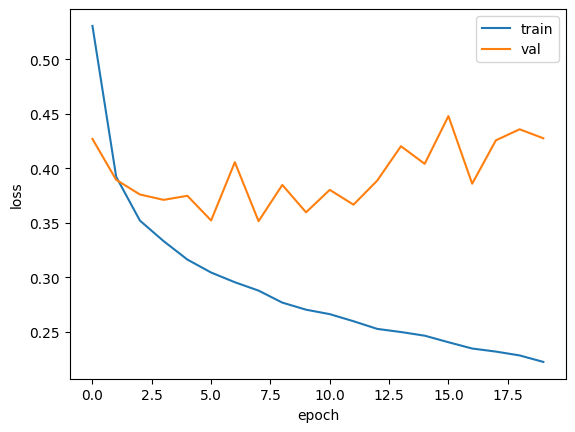

In [79]:
# 과대/과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그려보자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [80]:
# 위 그래프에서 훈련 손실은 꾸준히 감소하지만 검증 손실은 에프코 5번만에 다시 상승하는 것으로 보아 전형적인 과대적합 모델이 만들어짐
# 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들고 검증 세트에 대한 정확도도 증가할 것
# 과대적합을 막기위해서 전에 배웠던 규제 방식 대신 신경망에 특화된 규제 방식을 적용하는건 다음 장에서 하고 이번에는 옵티마이저 하이퍼파라미터로 조정 가능한지 알아보도록 하자

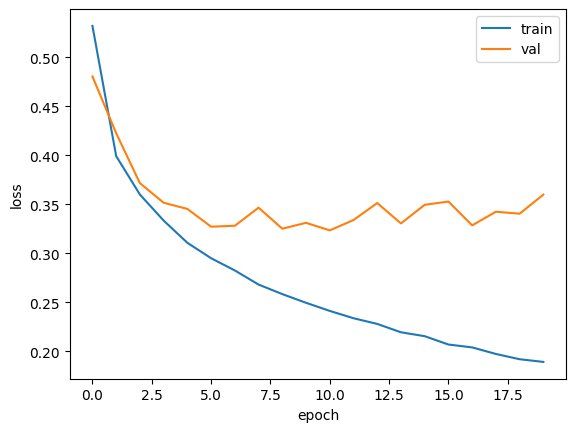

In [81]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [82]:
# 아까보단 그래도 나아졌지만 그래도 조금.. 더 나은 손실 곡선을 얻기위해서 학습률을 조정해서 다시 시도해 볼 수 있지만 지금은 규제 방법을 먼저 학습해보자

In [83]:
## 드롭아웃

In [84]:
# 드롭아웃은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
# 뉴런은 랜덤하게 드롭아웃 되고 드롭 수는 우리가 정해야 할 또 다른 파라미터임
# 케라스에서는 드롭아웃을 keras.lyers 패키지 아래 Dropout 클래스로 제공

In [88]:
# 30% 정도를 드롭아웃
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


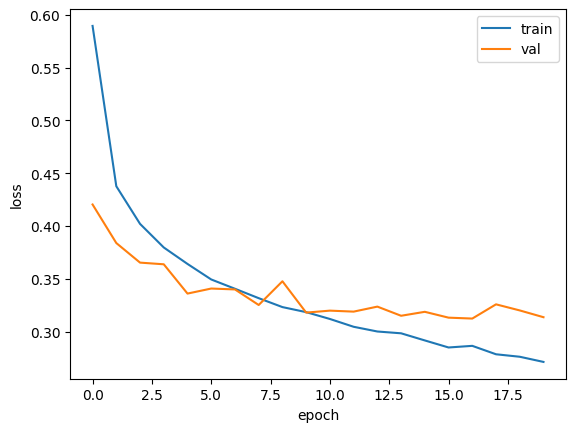

In [89]:
# 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않음
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [90]:
# 드롭 아웃을 적용하고 나서 과대적합이 확실하게 줄었음, 10번째 에포크 정도에서 검증 손실의 감소는 멈추지만 크게 상승하지 않고 어느 정도 유지하고 있음
# 에포크를 20번이나 했기 때문에 결국 과대적합임, 그러니까 에포크 횟수를 10번으로 줄여보겠음

In [91]:
## 모델 저장과 복원

In [92]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [93]:
# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공
# 기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장

In [95]:
model.save_weights('model-weights.h5')

In [96]:
# 또한 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공
# 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장

In [97]:
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
# 저장된 파일들 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Jan  7 13:52 model-weights.h5
-rw-r--r-- 1 root root 981176 Jan  7 13:53 model-whole.h5


In [102]:
# 두 가지 실험
# 첫 번째는 훈련을 하지 않은 새로운 모델을 만들고 model-weight.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
# save로 저장했던 모델과 정확히 같은 구조를 가져야함

In [103]:
# 모델의 검증 정확도 확인
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 2ms/step


0.8791666666666667

In [104]:
# 두 번째는 아예 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8792


[0.32632729411125183, 0.8791666626930237]

In [105]:
# evaluate()를 사용하기 위해서는 손실을 계산하기 위해 반드시 compile() 메서드를 실행해야함
# 그래서 첫번째는 정확도만 계산했고 두번째는 모델 구조와 옵티마이저 상태까지 모두 복원하기 때문에 evaluate()를 사용 가능

In [106]:
# 우리는 지금까지 20번의 에포크를 반복한 뒤 모델이 과대적합인 것을 확인하고 다시 에포크를 줄였는데 이를 한 번에 할 수는 없을까?

In [107]:
## 콜백

In [108]:
# 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들임
# 여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장함
# save_best_only=True를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장 할 수 있음
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [109]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8857


[0.318546861410141, 0.8857499957084656]

In [111]:
# 확실히 편하긴 하지만 여전히 20번의 에포크 동안 훈련을 함, 검증 점수가 오르기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없음
# 이럴 때 훈련을 미리 중지하는 것을 조기 종료라고 부름 - 조기 종료는 훈련 에포크 횟수를 제한하는 역할하지만 이 역시 규제 방법 중 하나로 생각할 수 있음
# EarlyStopping 콜백을 제공 : patience 매개변수는 지정한 횟수 만큼 연속으로 검증 점수가 향상되지 않으면 훈련을 중지시킴, restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
# EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장한 후 검증 손실이 증가하면 훈련 중지, 다시 파일을 불러와서 최상의 파라미터로 만듬
model = model_fn(keras.layers.Dropout(0,3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb])
# EarlyStopping의 patiecne를 2로 지정했으니 두 번 연속 검증 점수가 향상되지 않으면 훈련을 중지 시킬꺼임
# 교재에서는 verbose=0 으로 설정해뒀으나 나는 어디까지 하고 중지하는 보고 싶어서 따로 설정하지 않음

Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5255 - accuracy: 0.8161 - val_loss: 0.4222 - val_accuracy: 0.8518
Epoch 2/20
  42/1500 [..............................] - ETA: 5s - loss: 0.4176 - accuracy: 0.8497

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 5s 3ms/step - loss: 0.3947 - accuracy: 0.8584 - val_loss: 0.3862 - val_accuracy: 0.8593
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3533 - accuracy: 0.8730 - val_loss: 0.3490 - val_accuracy: 0.8756
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3253 - accuracy: 0.8806 - val_loss: 0.3482 - val_accuracy: 0.8752
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3094 - accuracy: 0.8864 - val_loss: 0.3330 - val_accuracy: 0.8800
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2930 - accuracy: 0.8920 - val_loss: 0.3493 - val_accuracy: 0.8726
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2808 - accuracy: 0.8959 - val_loss: 0.3485 - val_accuracy: 0.8765


In [112]:
# 이걸로 몇 번째 에포크에서 훈련을 중지했는데 확인 가능
early_stopping_cb.stopped_epoch
# 6번이 나왔으니 최상의 모델은 5번째 에포크

6

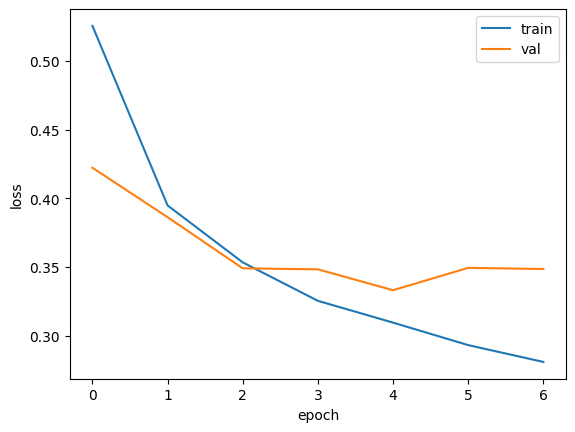

In [113]:
# 훈련 손실과 검증 손실을 출력해서 확인해 보겠음
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [114]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능을 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8800


[0.333031564950943, 0.8799999952316284]